# Campus Recuritment Model
## Predicting The Salary 

## Import Important Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Read and Explore Dataset

In [2]:
dataset = pd.read_csv("Placement_Data_Full_Class.csv")
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
dataset.shape

(215, 15)

In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
dataset[dataset['status'] == "Not Placed"]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


## Data Cleaning

#### As we can see and it is logical that the person who is not placed does not have salary
#### so replacing the Null values with 0

In [6]:
dataset.fillna(0, inplace=True)

## Data Analysis

### Count of Male Placed vs Count of Female Placed

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


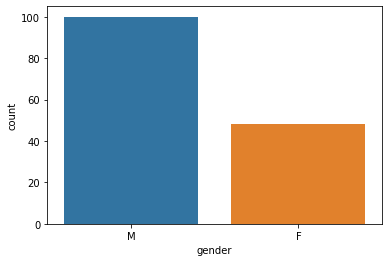

In [7]:
sn.countplot(dataset[dataset['status'] == 'Placed']['gender'])
plt.show()

### Finding the Correlation between the Features

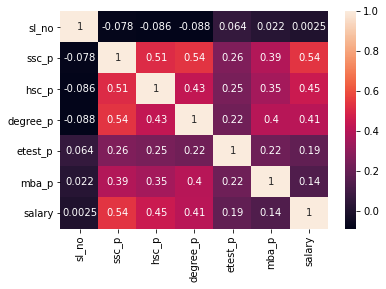

In [8]:
sn.heatmap(dataset.corr(), annot=True)
plt.show()

## Percentage Marks vs Salary

In [9]:
# Highest Salary
print("Max Salary :-> ", dataset['salary'].max(),"₹")

Max Salary :->  940000.0 ₹


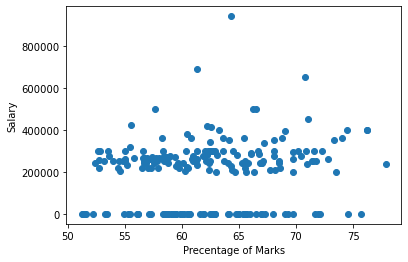

In [10]:
plt.scatter(dataset['mba_p'], dataset['salary'])
plt.xlabel("Precentage of Marks")
plt.ylabel("Salary")
plt.show()

#### From the above Graph we can see that precentage does not affect the Salary of Individual

### Count of Placement of Students of different Stream

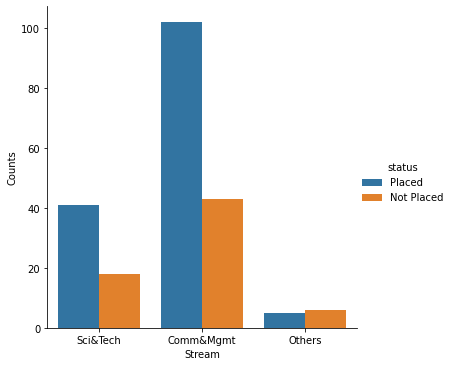

In [11]:
sn.catplot(data=dataset, x = 'degree_t', hue='status', kind='count')
plt.xlabel("Stream")
plt.ylabel("Counts")
plt.show()

### Gender wise Placements

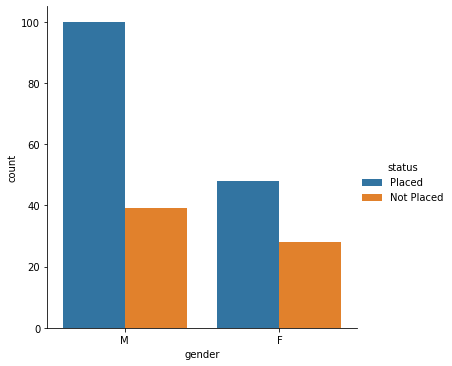

In [12]:
sn.catplot(data=dataset, x='gender', kind='count', hue='status')
plt.show()

## Convert Categorical Features to Numeric Features

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [14]:
cat_features = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
cat_data = dataset[cat_features]

### Convert Categorical to numeric

In [15]:
cat_to_num = pd.get_dummies(cat_data, drop_first=True)
num_data = dataset.drop(cat_features, axis=1)
cat_to_num.head()

,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,1,1,1,0,0,1,0,1,1
1,1,0,1,0,1,0,1,1,0,1
2,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,0,0,0,1


In [16]:
num_data.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1,67.00,91.00,58.00,55.0,58.80,270000.0
1,2,79.33,78.33,77.48,86.5,66.28,200000.0
2,3,65.00,68.00,64.00,75.0,57.80,250000.0
3,4,56.00,52.00,52.00,66.0,59.43,0.0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0


In [17]:
final_dataframe = pd.concat([num_data, cat_to_num], axis=1)
final_dataframe.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,0,0,1,0,1,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,1,0,1,0,1,0,1,1,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0.0,1,0,0,0,1,0,1,0,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,0,1,0,0,0,0,0,1


In [18]:
target = final_dataframe['salary']
final_dataframe.drop(['salary','sl_no'], axis=1, inplace=True)

## Converting the data into standard scale

In [19]:
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()
scale_data = sc_scale.fit_transform(final_dataframe)

## Model Selection

## Split the data into training and testing data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scale_data, target)

## Building Model Using KNN Algorithm

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [22]:
knn_model = knn.fit(X_train, y_train)

In [23]:
from sklearn.metrics import mean_squared_error
print("RMSE of KNN Model :-> ", np.sqrt(mean_squared_error(y_test, knn_model.predict(X_test))))

RMSE of KNN Model :->  97116.2686146334


## Building Model Using Random Forest Algorithm

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [25]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
print("RMSE of Random Forest Model :-> ", np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test))))

RMSE of Random Forest Model :->  57327.64282160467


## Building Model Using XGBoost Regressor Algorithm

In [27]:
import xgboost

In [28]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
print("RMSE of XGBoost Model :-> ", np.sqrt(mean_squared_error(y_test, xgb_reg.predict(X_test))))

RMSE of XGBoost Model :->  56816.004577370826
